In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [3]:
df_smiles_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_smiles_attentions_gep.csv')
df_smiles_att.head()

,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,5-Fluorouracil,PCM,OPM2,0.002356,0.003071,0.002732,0.004914,0.004261,0.004978,0.001775,...,0.026119,0.028015,0.010345,0.021115,0.011152,0.008832,0.005626,0.006518,0.009014,0.005490
1,5-azacytidine,PCM,OPM2,0.002204,0.002897,0.002576,0.004770,0.004089,0.004820,0.001639,...,0.017020,0.008060,0.010243,0.006067,0.029940,0.015759,0.011790,0.008960,0.005428,0.005950
2,A-366,PCM,OPM2,0.002104,0.002775,0.002463,0.004676,0.003960,0.004714,0.001537,...,0.006011,0.005778,0.009135,0.004954,0.008338,0.016123,0.018105,0.010478,0.005555,0.005962
3,ABT737,PCM,OPM2,0.001874,0.002511,0.002220,0.004436,0.003700,0.004466,0.001332,...,0.005321,0.005187,0.006720,0.006663,0.007908,0.006287,0.005171,0.004562,0.009057,0.006331
4,AGI-5198,PCM,OPM2,0.001997,0.002653,0.002349,0.004567,0.003842,0.004599,0.001443,...,0.008812,0.008993,0.008153,0.015015,0.015713,0.017204,0.017644,0.010247,0.005821,0.006480


In [4]:

# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# NSCLC:['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
# LUAD:['NCIH2228','HCC827','EKVX','PC14']
# SCLC:['NCIH526','LU135','NCIH146','NCIH1963']
cell_line = ['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
# cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
df_smiles_att_single_filtered = df_smiles_att[df_smiles_att['cell_line'].isin(cell_line)]
print(df_smiles_att_single_filtered.shape)
df_smiles_att_single_filtered.head()

(1749, 259)


,drug,OncotreeCode,cell_line,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
9492,5-Fluorouracil,LUAD,HCC827,0.002332,0.003051,0.002696,0.004938,0.004247,0.004951,0.001768,...,0.004756,0.011355,0.020660,0.022690,0.030576,0.010715,0.024845,0.009376,0.005229,0.005370
9493,5-azacytidine,LUAD,HCC827,0.002176,0.002872,0.002533,0.004793,0.004070,0.004788,0.001628,...,0.007311,0.010262,0.009790,0.014226,0.006366,0.007301,0.006427,0.006597,0.007583,0.005239
9494,A-366,LUAD,HCC827,0.002058,0.002732,0.002405,0.004687,0.003927,0.004668,0.001514,...,0.018097,0.013081,0.009018,0.009293,0.018190,0.016391,0.019258,0.009990,0.006284,0.006972
9495,ABT737,LUAD,HCC827,0.001845,0.002486,0.002181,0.004459,0.003681,0.004436,0.001318,...,0.008413,0.007852,0.011294,0.007599,0.012511,0.005637,0.007708,0.004638,0.003451,0.003847
9496,AGI-5198,LUAD,HCC827,0.001975,0.002638,0.002317,0.004602,0.003835,0.004579,0.001442,...,0.011213,0.014160,0.012123,0.005891,0.009362,0.010309,0.008090,0.005004,0.003960,0.004632


In [5]:
df_pathways_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(1749, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
9492,5-Fluorouracil,HCC827,LUAD,0.001369,0.001426,0.001540,0.002264,0.001739,0.001743,0.001756,...,0.001509,0.001329,0.001365,0.001443,0.001413,0.001735,0.002677,0.001404,0.002237,0.001536
9493,5-azacytidine,HCC827,LUAD,0.001556,0.001327,0.001549,0.002153,0.001751,0.001593,0.001424,...,0.001550,0.001314,0.001348,0.001411,0.001411,0.001747,0.002680,0.001549,0.002575,0.001526
9494,A-366,HCC827,LUAD,0.001391,0.001622,0.001523,0.001685,0.001708,0.001727,0.001567,...,0.001524,0.001405,0.001509,0.001394,0.001567,0.001561,0.002652,0.001285,0.002561,0.001581
9495,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
9496,AGI-5198,HCC827,LUAD,0.001361,0.001451,0.001533,0.001655,0.001740,0.001577,0.001578,...,0.001534,0.001364,0.001502,0.001404,0.001403,0.001734,0.002483,0.001392,0.002451,0.001517


In [6]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001384
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001588
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001527
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.001553
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001653
dtype: float64

In [7]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [8]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [9]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
288,0.002643,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
552,0.002627,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...
153,0.002621,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...
358,0.002620,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...
518,0.002618,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...


In [10]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(619, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002643,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
1,0.002627,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,552,N00966,Variant,Spinocerebellar ataxia
2,0.002621,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,153,N01461,Reference,TGFB signaling
3,0.002620,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,358,N01163,Reference,PI3K signaling
4,0.002618,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...,518,N00120,Variant,Transcription


In [11]:
# 将df_pathways_single_drug_mean_merge前82个标记为红色，其余为蓝色
df_pathways_single_drug_mean_merge['color'] = np.where(df_pathways_single_drug_mean_merge.index < 84, 'r', 'b')
df_pathways_single_drug_mean_merge.head()

,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class,color
0,0.002643,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria),r
1,0.002627,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,552,N00966,Variant,Spinocerebellar ataxia,r
2,0.002621,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,153,N01461,Reference,TGFB signaling,r
3,0.002620,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,358,N01163,Reference,PI3K signaling,r
4,0.002618,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...,518,N00120,Variant,Transcription,r


中值: 0.0015184811829616926


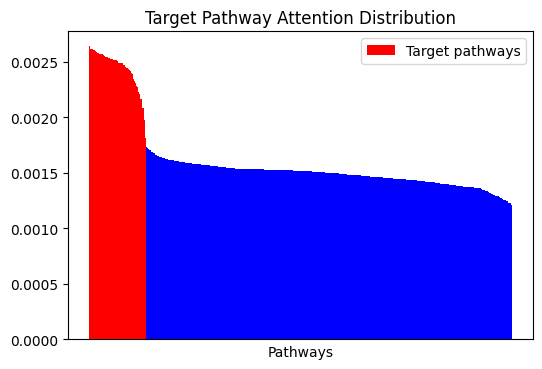

In [13]:
# 设置画布大小
plt.figure(figsize=(6, 4))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean_merge['pathway_name'], df_pathways_single_drug_mean_merge['attention'], color=df_pathways_single_drug_mean_merge['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
# plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
# plt.text(309, 0.00262, 'Median: 0.001532', ha='center', va='bottom', fontsize=10)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend()
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title('Target Pathway Attention Distribution')
plt.xticks([])
plt.xlabel('Pathways', fontsize=10)
# 保存图片
# plt.savefig('NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [108]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_class分组计数
df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 84].groupby('pathway_class').count()

,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,color
pathway_class,,,,,,
AVP signaling,1,1,1,1,1,1
Acute myeloid leukemia,1,1,1,1,1,1
Alzheimer disease,1,1,1,1,1,1
Amyotrophic lateral sclerosis,2,2,2,2,2,2
CGAS-STING signaling,1,1,1,1,1,1
CRH-ACTH-cortisol signaling,3,3,3,3,3,3
Calcium signaling,5,5,5,5,5,5
Complement cascade,2,2,2,2,2,2
Cytoskeletal regulation (viruses and bacteria),1,1,1,1,1,1


In [111]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_class分组计数
df_counts = df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 84].groupby('pathway_class').count()
df_counts = df_counts.sort_values(by='attention', ascending=False)
# 取df_counts前两列
df_counts = df_counts.iloc[:, 0:1]
# 将第二列重命名为count
df_counts.columns = ['count']
df_counts

,count
pathway_class,
Transcription,5
Calcium signaling,5
TGFB signaling,5
NOTCH signaling,5
PI3K signaling,4
Spinocerebellar ataxia,4
KISS1-GnRH-LH/FSH-E2 signaling,4
CRH-ACTH-cortisol signaling,3
Human cytomegalovirus (HCMV),3


In [110]:
# 画出df_counts的饼图，将前十个count合并，其余合并为others

KeyError: 'pathway_class'

In [61]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_type分组计数
df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 84].groupby('pathway_type').count()

,attention,pathway_name,Unnamed: 0,pathway_id,pathway_class,color
pathway_type,,,,,,
Env factor,3,3,3,3,3,3
Pathogen,5,5,5,5,5,5
Reference,60,60,60,60,60,60
Variant,16,16,16,16,15,16
